# Les naufragés du Titanic

L'objectif de ce TP est d'introduire de manière pratique quelques notions qui seront détaillées lors du cours de *Données Intelligentes*.  
Comme vous n'avez pas suivi le cours d'UED (Utilisation et Exploitation de Données) de première année, il servira également de mise à niveau accélérée sur les notebooks, Python et la manipulation de données à l'aide de la bibliothèque [pandas](https://pandas.pydata.org/).

Les données support de ce TP sont une liste (ou plus précisément deux listes) de personnes à bord du Titanic au moment de son naufrage. Ces données, réelles, sont parfois incomplètes, incertaines, voire fausses. Elles sont issues de la fusion de plusieurs sources, dont les trois principales sont :

- [Un jeu de données consolidé par l'université Vanderbilt](https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic.html)
- Wikipedia ([passagers](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) et [équipage](https://en.wikipedia.org/wiki/Crew_of_the_RMS_Titanic))
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org)

Si vous observez des erreurs sur les données consolidées (et il est probable qu'il en reste), n'hésitez pas à me transmettre vos suggestions de correction.

## Rendu et organisation

Le compte-rendu du TP prendra la forme d'un notebook Jupyter, soit en complétant celui-ci, soit en en créant un nouveau. Ce notebook doit inclure à la fois vos codes python de traitement, les résultats de leurs exécutions, ainsi que vos analyses et réflexions **rédigées** dans des cellules Markdown.  
Votre notebook doit pouvoir être ré-exécuté intégralement et **séquentiellement**. Assurez vous que ce soit bien le cas avant de le rendre.  
La date limite de dépôt du notebook (au format ipynb) sur moodle est fixée au 5 février 2021.

Comme le cours associé n'a pas encore eu lieu, l'évaluation de ce TP portera sur :

- votre implication dans le travail réalisé (principalement en séance, mais aussi en dehors si nécessaire),
- le soin apporté à votre compte-rendu,
- votre compréhension et la restitution dans le compte-rendu des informations que vous aurez pu assimiler lors de la séance, que ce soit en lisant de la documentation en ligne ou en interrogeant votre encadrant de séance.

## Description des données

### Passagers

Le fichier `passengers.csv` contient la liste des passagers à bord du Titanic.

Les informations de ce fichier sont les suivantes :

- **class** : classe de la réservation (1re, 2e ou 3e)
- **survived** : si le passager à survécu (1 = oui, 0 = non)
- **title** : titre
- **surname** : nom de famille
- **first name** : prénom(s) &ndash; pour les femmes mariées le prénom du mari est indiqué, puis les prénoms et nom de jeune fille sont donnés entre parenthèses
- **sex** : sexe
- **age** : âge au moment du naufrage &ndash; pour les passagers de moins d'un an, l'âge est donné en proportion d'une année (réel entre 0 et 1)
- **birthday** : date de naissance
- **nationality** : nationalité
- **sibsp** : nombre de frères, sœurs ou époux à bord
- **parch** : nombre de parents ou enfants à bord
- **ticket** : numéro de réservation
- **fare** : prix total de la traversée en livre sterling, pour l'ensemble des passagers concernés par la réservation
- **cabin** : cabine &ndash; identifiant du pont (lettre entre A et G, du haut vers le bas) suivi du numéro de cabine ; si plusieurs cabines sont réservées, celles-ci sont séparées par des espaces ; les cabines spéciales du pont supérieur sont identifiées par une lettre entre T et Z
- **boarded** : port d'embarquement (B = Belfast, Royaume-Uni ; C = Cherbourg, France ; Q = Queenstown, Irlande ; S = Southampton, Royaume-Uni)
- **lifeboat** : identifiant du premier canot de sauvetage utilisé &ndash; certains passagers ont dû changer de canot après le naufrage
- **body** : numéro d'identification du corps retrouvé
- **home.dest** : lieu de résidence / destination

### Équipage

Le fichier `crew.csv` contient la liste des membres d'équipage du Titanic.

Les informations de ce fichier sont les suivantes :

- **survived** : si le membre d'équipage à survécu (1 = oui, 0 = non)
- **title** : titre
- **surname** : nom de famille
- **first name** : prénom(s) &ndash; pour les femmes mariées le prénom du mari est indiqué, puis les prénoms et nom de jeune fille sont donnés entre parenthèses
- **sex** : sexe
- **age** : âge au moment du naufrage
- **department** : secteur de travail, repris des [catégories données sur Wikipedia](https://en.wikipedia.org/wiki/Crew_of_the_RMS_Titanic)
- **position** : intitulé du poste occupé
- **boarded** : port d'embarquement (B = Belfast, Royaume-Uni ; S = Southampton, Royaume-Uni)
- **lifeboat** : identifiant du premier canot de sauvetage utilisé &ndash; certains membres d'équipage ont dû changer de canot après le naufrage
- **body** : numéro d'identification du corps retrouvé
- **home** : lieu de résidence

### Canots de sauvetage

Le fichier `lifeboats.csv` contient la liste des canots de sauvetages.

Les informations de ce fichier sont les suivantes :

- **lifeboat** : identifiant du canot
- **side** : coté d'attache du canot (port = bâbord, starboard = tribord)
- **launched** : heure de mise à l'eau &ndash; les canots A et B n'ont pas été mis à l'eau mais ont flotté suite au naufrage
- **recovered** : heure de récupération du canot par le RMS Carpathia
- **capacity** : capacité maximale, en nombre de passagers

# Imports

## Dépendances

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

## Configuration du rendu des graphiques par défaut

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

# Exploration guidée

Les quelques questions de cette première partie ont pour objectif de vous faire manipuler et croiser les données des différents fichiers, afin de mieux les appréhender et de prendre en main la bibliothèque pandas.

## Import des données

Il existe plusieurs [constructeurs de DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Dans notre cas, nous alons chercher à importer les données depuis des fichiers csv à l'aide de la fonction [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv).

L'exemple de la cellule suivante importe les données du fichier `passengers.csv`. Cette méthode comporte de nombreuses options, dont `parse_dates` qui permet d'expliciter la conversion du contenu d'une colonne en dates.

In [3]:
passengers = pd.read_csv('titanic/passengers.csv', parse_dates=['birthday'])

Une DataFrame pandas est, conceptuellement, un tableau à deux dimensions, avec une notion de *schéma commun*, c'est à dire que toutes les lignes présentent des informations décrites de manière homogène : elles possèdent toutes les mêmes informations (colonnes) et deux informations d'une même colonne sont représentées avec le même type.

Avec le vocabulaire utilisé en analyse statistique, les colonnes correspondent aux *variables* et les lignes aux *observations*.

Les intitulés et l'ordre des colonnes sont accessibles depuis l'attribut `columns` tandis que les types sont décrits par l'attribut `dtypes`.

In [4]:
passengers.columns

Index(['class', 'survived', 'title', 'surname', 'first name', 'sex', 'age',
       'birthday', 'nationality', 'sibsp', 'parch', 'ticket', 'fare', 'cabin',
       'boarded', 'lifeboat', 'body', 'home.dest'],
      dtype='object')

In [6]:
passengers.head()

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.50,B77,S,8,NaN,"London, England"
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.50,B79,S,8,NaN,NaN
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.50,B77,S,8,NaN,"London Vancouver, BC"
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.65,E67,S,NaN,NaN,"New York, NY"
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.65,E67,S,8,NaN,"New York, NY"


In [5]:
passengers.dtypes

class                   int64
survived                int64
title                  object
surname                object
first name             object
sex                    object
age                   float64
birthday       datetime64[ns]
nationality            object
sibsp                   int64
parch                   int64
ticket                 object
fare                  float64
cabin                  object
boarded                object
lifeboat               object
body                  float64
home.dest              object
dtype: object

Les types gérés nativement sont :

- les valeurs numériques entières, réelles ou complexes,
- les dates,
- les booléens,
- les chaînes de caractères de taille fixe.

Toutes les autres représentations (en particulier les chaînes de caractères de taille variable) prennent la forme d'un objet Python.

## Consultation

Par défaut, la consultation du contenu d'une DataFrame volumineuse n'en présente qu'un extrait (les cinq premières et les cinq dernières lignes).

In [6]:
passengers

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England"
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC"
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.650,E67,S,NaN,NaN,"New York, NY"
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1313,3,0,Mr.,Ford,Edward Watson,male,18.0,NaT,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1315,3,0,Mr.,Ford,William Neal,male,16.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


Les fonctions [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) et [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail) servent à extraire les premières ou dernières lignes.

In [7]:
passengers.head(10)

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.50,B77,S,8,NaN,"London, England"
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.50,B79,S,8,NaN,NaN
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.50,B77,S,8,NaN,"London Vancouver, BC"
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.65,E67,S,NaN,NaN,"New York, NY"
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.65,E67,S,8,NaN,"New York, NY"
5,1,1,Miss,Taussig,Ruth,female,18.0,1893-11-25,American,0,2,110413,79.65,E68,S,8,NaN,"New York, NY"
6,1,0,Mr.,Clifford,George Quincy,male,40.0,1871-11-20,American,0,0,110465,52.00,A14,S,NaN,NaN,"Stoughton, MA"
7,1,0,Mr.,Porter,Walter Chamberlain,male,46.0,1865-05-13,American,0,0,110465,52.00,C110,S,NaN,207.0,"Worcester, MA"
8,1,0,Mr.,Maguire,John Edward,male,30.0,1882-02-07,American,0,0,110469,26.00,C106,S,NaN,NaN,"Brockton, MA"
9,1,0,Mr.,Borebank,John James,male,42.0,NaT,English,0,0,110489,26.55,D22,S,NaN,NaN,"London / Winnipeg, MB"


Importer et visualiser le contenu des fichiers correspondant aux membres d'équipage et aux canots de sauvetage.

In [8]:
crew = pd.read_csv('titanic/crew.csv')

In [9]:
lifeboats = pd.read_csv('titanic/lifeboats.csv')

## Accès et recherche dans une DataFrame

Trois types d'indexation sont utilisés pour accéder à une ou plusieurs lignes précises d'une DataFrame :

- des valeurs ou des plages d'index (`loc`),
- des valeurs ou des plages de positions (`iloc`),
- des tableaux de booléens.

### Accès par valeur d'index ou par position

Lors de la visualisation des DataFrames, vous avez dû remarquer que la première colonne (sans intitulé) correspond à une valeur numérique qui n'est pas présente dans les fichiers csv originaux. Cette colonne est l'index de la DataFrame, qui sert d'identifiant unique d'une ligne et qui peut être redéfini si besoin.

Avec l'index entier défini par défaut, l'accès par index (`loc`) ou par position (`iloc`) sont très similaires.

In [10]:
passengers.loc[100:105]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
100,1,0,Mr.,Wright,George,male,62.0,1849-10-26,American,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS"
101,1,1,Mr.,Beckwith,Richard Leonard,male,37.0,1874-11-09,American,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
102,1,1,Mrs.,Beckwith,Richard Leonard (Sallie Monypeny),female,46.0,1865-09-21,American,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
103,1,1,Miss,Newsom,Helen Monypeny,female,19.0,1892-12-30,American,0,2,11752,26.2833,D47,S,5,NaN,"New York, NY"
104,1,1,Mr.,Kimball,Edwin Nelson Jr,male,42.0,1870-03-08,American,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
105,1,1,Mrs.,Kimball,Edwin Nelson Jr (Gertrude Parsons),female,45.0,1866-10-04,American,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"


## Accès par indexation booléenne

Un tableau de booléens de la même taille (en nombre de lignes) que la DataFrame peut aussi être utilisé pour sélectionner un ensemble de lignes à conserver.

L'exemple de la cellule suivante illustre ce fonctionnement, même si ce mécanisme n'est généralement pas utilisé de cette manière (l'utilisation usuelle est présentée juste après).

In [12]:
passengers[[True] + [False] * (len(passengers) - 2) + [True]]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.50,B77,S,8,NaN,"London, England"
1316,3,0,Miss,Harknett,Alice Phoebe,female,21.0,1890-10-15,English,0,0,W/C 6609,7.55,NaN,S,NaN,NaN,NaN


Le résultat d'une opération arithmétique ou logique sur une colonne d'une DataFrame (on parle de [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)) donne une nouvelle série contentant le résultat de l'opération appliquée à chaque valeur de la série originale.

L'exemple de la cellule suivante teste si le sexe d'un passager est féminin.

In [13]:
passengers['sex'] == 'female'

0        True
1        True
2        True
3       False
4        True
        ...  
1312     True
1313    False
1314     True
1315    False
1316     True
Name: sex, Length: 1317, dtype: bool

Ce résultat, assimilé à un tableau de booléens peut alors être injectée comme filtre sur la DataFrame originale afin de ne récupérer que les informations des passagères.

In [14]:
passengers[passengers['sex'] == 'female']

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England"
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC"
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY"
5,1,1,Miss,Taussig,Ruth,female,18.0,1893-11-25,American,0,2,110413,79.650,E68,S,8,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,3,0,Miss,Johnston,"Catherine Helen ""Carrie""",female,7.0,1905-02-19,English,1,2,W/C 6607,23.450,NaN,S,NaN,NaN,NaN
1311,3,0,Miss,Ford,"Doolina Margaret ""Daisy""",female,20.0,1891-06-13,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


Les tableaux de booléens peuvent être combinés avec les opérateurs `&` (et) et `|` (ou) afin de filtrer des valeurs sur une combinaison de critères (attention aux parenthèses, souvent nécessaires car ces deux opérateurs ont priorité sur les opérateurs de comparaison).

L'exemple de la cellule suivante recherche les passagères dont le titre n'est pas `Mrs.` et dont la date de naissance est renseignée.

In [15]:
passengers[(passengers['sex'] == 'female') & (passengers['title'] != 'Mrs.') & passengers['birthday'].notnull()]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.5000,B77,S,8,NaN,"London, England"
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.5000,B77,S,8,NaN,"London Vancouver, BC"
5,1,1,Miss,Taussig,Ruth,female,18.0,1893-11-25,American,0,2,110413,79.6500,E68,S,8,NaN,"New York, NY"
16,1,1,Miss,Hippach,Jean Gertrude,female,17.0,1894-09-30,American,0,1,111361,57.9792,B18,C,4,NaN,"Chicago, IL"
31,1,1,Miss,Gibson,Dorothy Winifred,female,22.0,1889-05-17,American,0,1,112378,59.4000,NaN,C,7,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,3,1,Miss,Heikkinen,Laina,female,16.0,1896-01-25,Finnish,0,0,STON/OQ 3101282,7.9250,NaN,S,14,NaN,NaN
1309,3,0,Miss,Johnston,"Catherine Helen ""Carrie""",female,7.0,1905-02-19,English,1,2,W/C 6607,23.4500,NaN,S,NaN,NaN,NaN
1311,3,0,Miss,Ford,"Doolina Margaret ""Daisy""",female,20.0,1891-06-13,English,2,2,W/C 6608,34.3750,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.3750,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


L'arrière-arrière-arrière-grand-mère de votre binôme (fictif) se trouvait à bord du Titanic ! Quelles informations complémentaires pouvez-vous donner sur sa traversée et celle des membres de sa famille ?  
Pour la retrouver, il vous donne les indications suivantes :

- elle avait 24 ans au moment de la traversée,
- elle voyageait en deuxième classe avec deux autres membres de sa famille,
- elle a embarqué à Cherbourg,
- elle s'appelait Marie Antonie Romodanowski, mais ce n'était peut-être pas son nom à l'époque (cette information n'est pas essentielle pour la retrouver, mais pourra vous servir à valider votre réponse).  

In [20]:
passengers[(passengers['sex'] == 'female') & (passengers['age'] == 24) & (passengers['class'] == 2)]
           #& (passengers['home.dest'] == 'Cherbourg')]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
335,2,1,Miss,Herman,Alice,female,24.0,1887-12-04,English,1,2,220845,65.0000,NaN,S,9,NaN,"Somerset / Bernardsville, NJ"
336,2,1,Miss,Herman,Kate,female,24.0,1887-12-04,English,1,2,220845,65.0000,NaN,S,9,NaN,"Somerset / Bernardsville, NJ"
405,2,1,Mrs.,Jacobsohn,Sidney Samuel (Amy Frances Christy),female,24.0,1888-04-08,English,2,1,243847,27.0000,NaN,S,12,NaN,London
418,2,1,Mrs.,Kantor,Sinai (Miriam Sternin),female,24.0,NaT,Russian,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY"
447,2,1,Mrs.,Hamalainen,William (Anna),female,24.0,NaT,Finnish,0,2,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
501,2,1,Mrs.,Richards,Sidney (Emily Hocking),female,24.0,1887-04-22,English,2,3,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
569,2,1,Mrs.,Mallet,Albert (Marie Antonie Magnin),female,24.0,1887-12-12,French,1,1,SC/PARIS 2079,37.0042,NaN,C,10,NaN,"Paris / Montreal, PQ"
585,2,1,Mrs.,del Carlo,Sebastiano (Argenia Genovesi),female,24.0,1887-11-06,Italian,1,0,SC/PARIS 2167,27.7208,NaN,C,12,NaN,"Lucca, Italy / California"


Quels passagers ont fêté leur anniversaire à bord du Titanic (c'est à dire entre le 10 et le 14 avril) ?

In [25]:
passengers[(passengers['birthday'].dt.month == 4) & (passengers['birthday'].dt.day >= 10) 
           & (passengers['birthday'].dt.day <= 14)]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
294,1,1,Mrs.,Cardeza,James Warburton Martinez (Charlotte Wardle Drake),female,58.0,1854-04-10,American,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
346,2,0,Mr.,Fox,Stanley Hubert,male,38.0,1874-04-13,American,0,0,229236,13.0000,NaN,S,NaN,236.0,"Rochester, NY"
381,2,0,Miss,Funk,Annie Clemmer,female,38.0,1874-04-12,American,0,0,237671,13.0000,NaN,S,NaN,NaN,"Janjgir, India / Pennsylvania"
498,2,1,Mrs.,Hocking,Elizabeth (Eliza Needs),female,54.0,1858-04-12,English,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH"
518,2,0,Mr.,Kvillner,Johan Henrik Johannesson,male,31.0,1881-04-11,Swedish,0,0,CA 18723,10.5000,NaN,S,NaN,165.0,"Sweden / Arlington, NJ"
642,3,1,Mrs.,Touma,Darwis (Hanne Youssef Razi),female,27.0,1885-04-10,Syrian,0,2,2650,15.2458,NaN,C,C,NaN,NaN
645,3,1,Master,Nicola-Yarred,Elias,male,12.0,1900-04-12,Syrian,1,0,2651,11.2417,NaN,C,C,NaN,NaN
666,3,1,Mr.,Barah,Hanna Assi,male,27.0,1885-04-10,Syrian,0,0,2663,7.2292,NaN,C,15,NaN,NaN
717,3,1,Miss,Sjoblom,Anna Sofia,female,18.0,1894-04-14,Finnish,0,0,3101265,7.4958,NaN,S,16,NaN,NaN
846,3,0,Mr.,Gustafsson,Karl Gideon,male,19.0,1893-04-10,Swedish,0,0,347069,7.7750,NaN,S,NaN,NaN,"Myren, Sweden New York, NY"


## Agrégats

La bibliothèque pandas propose des fonctions permettant de calculer des agrégats. Parmi les plus utilisés, on retrouve :

- des indicateurs de tendance centrale
    - médiane ([`median`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)),
    - moyenne ([`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)),
    - mode ([`mode`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)) &ndash; valeur la plus fréquente d'une série,
- des indicateurs de dispersion
    - minimum ([`min`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)),
    - maximum ([`max`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)),
    - écart type ([`std`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)),
    - variance ([`var`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)),
- la somme ([`sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)),
- le produit ([`prod`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.prod.html)),
- le dénombrement ([`count`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html), [`nunique`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) et [`size`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html)) &ndash; permettant de compter le nombre de valeurs, en incluant les valeurs nulles (avec `size`) ou non (avec `count`), ou en ignorant les doublons (avec `nunique`).

Chacune de ces fonctions (ou l'attribut `size`, qui n'est pas une fonction) peuvent être appliqués individuellement, ou plusieurs en même temps à l'aide de la fonction [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html).  
Ces agrégats peuvent être calculés par groupes de valeurs avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) ou, par défaut, sur l'ensemble de la DataFrame.

L'exemple de la cellule suivante donne le nombre d'employés par département (count) et le nombre de types de postes différents (nunique).

In [27]:
crew.head()

,survived,title,surname,first name,sex,age,department,position,boarded,lifeboat,body,home
0,1,Mr.,Anderson,James,male,40.0,Deck,Able Seaman,S,16,NaN,"Southampton, Hampshire, England"
1,1,Mr.,Anderson,John,male,41.0,Deck,Able Seaman,S,16,NaN,"Southampton, Hampshire, England"
2,1,Mr.,Archer,Ernest,male,36.0,Deck,Able Seaman,S,3,NaN,"Southampton, Hampshire, England"
3,1,Mr.,Bailey,Joseph,male,43.0,Deck,Master-at-arms,S,16,NaN,"Southampton, Hampshire, England"
4,0,Mr.,Bradley,T.,male,29.0,Deck,Able Seaman,S,NaN,NaN,"Southampton, Hampshire, England"


In [32]:
crew.groupby('department')['position'].agg(['count', 'nunique'])

,count,nunique
department,,
Deck,59,12
Engineering,319,36
Mail,5,1
Officers,8,8
Restaurant,69,35
Victualling,389,109


Calculer le prix individuel de la traversée, puis la médiane de cette valeure par classe (vous pouvez aussi visualiser la distribution de ces valeurs par classe à l'aide de la fonction [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)).

En considérant qu'une livre sterling de 1912 [correspond environ à 132 euros d'aujourd'hui](https://www.bankofengland.co.uk/monetary-policy/inflation/inflation-calculator), le coût relatif d'une traversée, par personne, a-t-il augmenté ou diminué ? Pour l'équivalent moderne, vous pourrez distinguer les deux types de transports possibles (avion, [bateau](https://www.seat61.com/queen-mary-2-transatlantic.htm#qm2-transatlantic-fares)).

In [62]:
tickets = passengers[['ticket', 'fare']]
tickets = tickets.groupby('ticket')['ticket'].agg(['count'])
tickets

,count
ticket,
110152,3
110413,3
110465,2
110469,1
110489,1
...,...
W/C 6607,4
W/C 6608,5
W/C 6609,1


In [65]:
df_passengers = passengers.merge(tickets, on='ticket')
df_passengers

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest,count
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England",3
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN,3
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC",3
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.650,E67,S,NaN,NaN,"New York, NY",3
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5
1313,3,0,Mr.,Ford,Edward Watson,male,18.0,NaT,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5
1315,3,0,Mr.,Ford,William Neal,male,16.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5


In [67]:
df_passengers['unit price'] = df_passengers['fare']/df_passengers['count']
df_passengers

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest,count,unit price
0,1,1,Miss,Cherry,Gladys,female,30.0,1881-08-27,English,0,0,110152,86.500,B77,S,8,NaN,"London, England",3,28.833333
1,1,1,Miss,Maioni,Roberta,female,20.0,NaT,English,0,0,110152,86.500,B79,S,8,NaN,NaN,3,28.833333
2,1,1,Countess,Rothes (of),(Lucy Noel Martha Dyer-Edwards),female,33.0,1878-12-25,Scottish,0,0,110152,86.500,B77,S,8,NaN,"London Vancouver, BC",3,28.833333
3,1,0,Mr.,Taussig,Emil,male,52.0,NaT,American,1,1,110413,79.650,E67,S,NaN,NaN,"New York, NY",3,26.550000
4,1,1,Mrs.,Taussig,Emil (Tillie Mandelbaum),female,39.0,1872-12-18,American,1,1,110413,79.650,E67,S,8,NaN,"New York, NY",3,26.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,3,0,Mrs.,Ford,Edward (Margaret Ann Watson),female,48.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5,6.875000
1313,3,0,Mr.,Ford,Edward Watson,male,18.0,NaT,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5,6.875000
1314,3,0,Miss,Ford,"Robina Maggie ""Ruby""",female,7.0,1904-04-25,English,2,2,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5,6.875000
1315,3,0,Mr.,Ford,William Neal,male,16.0,NaT,English,1,3,W/C 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA",5,6.875000


In [74]:
df_fare = df_passengers.groupby('class')['unit price'].agg(['mean', 'median'])
df_fare

,mean,median
class,,
1,33.848624,29.700000
2,11.080941,12.334733
3,7.282137,7.750000


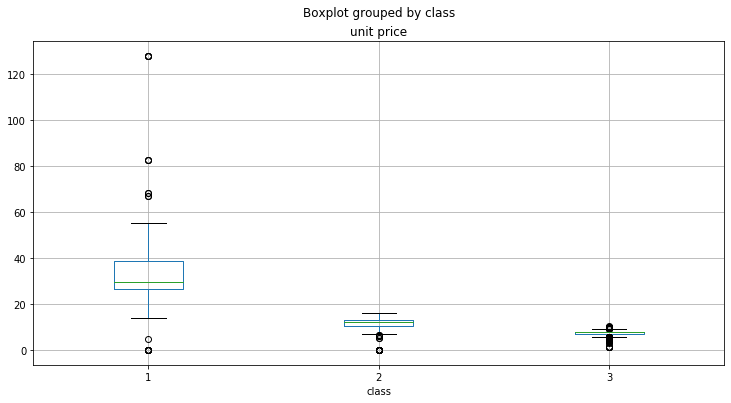

In [84]:
df_passengers.boxplot("unit price", by="class")

# Où sont les enfants ?

Dans cette partie, nous allons chercher à déterminer l'âge limite à partir de laquelle les jeunes personnes ne sont plus considérées comme des enfants.

Visualiser les [distributions](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) des âges des passagers en fonction de leur titre.  
Existe-t-il une paire de titres pour laquelle une distinction entre enfant et adulte semble être le critère principal ?

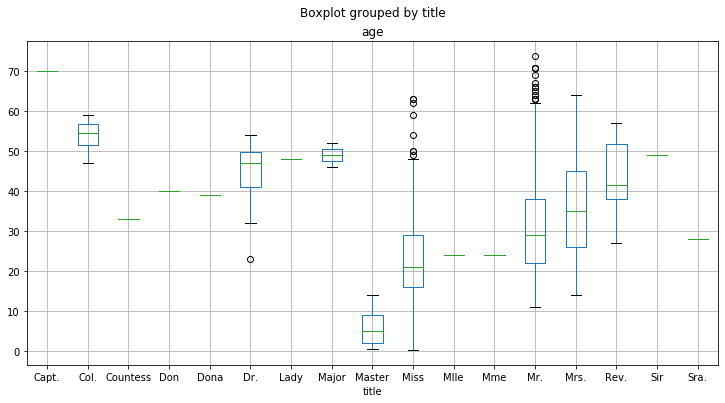

In [83]:
passengers.boxplot("age", by="title")

In [82]:
df_draft = passengers.groupby('title')['age'].agg(['min','count'])
df_draft

,min,count
title,,
Capt.,70.000000,1
Col.,47.000000,4
Countess,33.000000,1
Don,40.000000,1
Dona,39.000000,1
Dr.,23.000000,8
Lady,48.000000,1
Major,46.000000,2
Master,0.413699,61


Pour ces deux titres, consulter les listes des *enfants* les plus âgés et des *adultes* les plus jeunes.

In [105]:
# Title: Master and Mr.
min = passengers[passengers['title'] == 'Mr.']['age'].min()
max = passengers[passengers['title'] == 'Master']['age'].max()
mean = (min + max)/2
passengers[
    (passengers['age'] >= min)
          & (passengers['age'] <= max)]

,class,survived,title,surname,first name,sex,age,birthday,nationality,sibsp,parch,ticket,fare,cabin,boarded,lifeboat,body,home.dest
60,1,1,Miss,Carter,Lucile Polk,female,14.0,1897-10-20,American,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
63,1,1,Master,Carter,William Thornton II,male,11.0,1900-09-14,American,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
285,1,1,Master,Ryerson,John Borie,male,13.0,1898-12-16,American,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
339,2,0,Mr.,Sweet,George Frederick,male,14.0,1897-04-16,English,0,0,220845,65.0000,NaN,S,NaN,NaN,"Somerset / Bernardsville, NJ"
353,2,1,Miss,Becker,Ruth Elizabeth,female,12.0,1899-10-28,English,2,1,230136,39.0000,F4,S,13,NaN,"Guntur, India / Benton Harbour, MI"
385,2,1,Mrs.,Nasser,Nicholas (Adele Achem),female,14.0,1898-03-19,Syrian,1,0,237736,30.0708,NaN,C,NaN,NaN,"New York, NY"
441,2,1,Miss,Mellinger,Madeleine Violet,female,13.0,1899-02-22,English,0,1,250644,19.5000,NaN,S,14,NaN,"England / Bennington, VT"
540,2,1,Miss,Watt,Bertha J,female,12.0,1899-09-11,Scottish,0,0,CA 33595,15.7500,NaN,S,9,NaN,"Aberdeen / Portland, OR"
645,3,1,Master,Nicola-Yarred,Elias,male,12.0,1900-04-12,Syrian,1,0,2651,11.2417,NaN,C,C,NaN,NaN
646,3,1,Miss,Nicola-Yarred,Jamila,female,14.0,1898-04-15,Syrian,1,0,2651,11.2417,NaN,C,C,NaN,NaN


### Classification

On va chercher à déterminer automatiquement les critères de *jeunesse* à l'aide d'un [arbre de décision](https://scikit-learn.org/stable/modules/tree.html) de la bibliothèque scikit-learn.

Dans cette première version, la seule variable d'entrée du classificateur sera l'âge, et le label (ou la classe) de sortie sera binaire : enfant ou non. Il faudra donc extraire un tableau de la forme suivante (ou proche).

|      age | child |
|---------:|------:|
| 0.413699 | True  |
| 0.435616 | True  |
| 0.602740 | True  |
| ...      | ...   |
| 14       | False |
| 14       | True  |
| 15       | False |
| ...      | ...   |
| 71       | False |
| 74       | False |

Donner une séquence d'instructions permettant d'aboutir à ce résult.

In [146]:
df_child = passengers[['age', 'sibsp', 'parch']]
df_child['child'] = (df_child['age'] < mean) & ((df_child['sibsp']!=0) | (df_child['parch']!=0))
df_child = df_child.sort_values(by='age', ascending = True)
df_child.reset_index(drop=True, inplace=True)
df_child

d:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sibsp,parch,child
0,0.200000,1,2,True
1,0.413699,0,2,True
2,0.435616,0,1,True
3,0.602740,1,1,True
4,0.761644,2,1,True
...,...,...,...,...
1312,71.000000,0,0,False
1313,71.000000,0,0,False
1314,74.000000,0,0,False
1315,NaN,0,0,False


Existe-t-il des valeurs manquantes ? Si oui, quelle stratégie souhaitez vous mettre en œuvre pour les traiter ?

In [152]:
# Enfants not go alone
df_new = df_child.dropna()
df_new = df_new.drop(['sibsp', 'parch'], axis=1)
df_new

,age,child
0,0.200000,True
1,0.413699,True
2,0.435616,True
3,0.602740,True
4,0.761644,True
...,...,...
1310,70.000000,False
1311,71.000000,False
1312,71.000000,False
1313,71.000000,False


Générer un arbre de décision permettant de classer nos passagers.

Valider son fonctionnement en lui [demandant le label](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) associé à une série d'âges pertinents.

Visualiser (avec [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) ou [export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html)) les conditions qui ont été définies pour naviguer dans l'arbre.  
Votre stratégie de gestion des valeurs manquante peut-elle avoir un impact sur l'arbre généré ?

Y a-t-il des enfants parmi les membres de l'équipage ?

In [153]:
clf = tree.DecisionTreeClassifier()
clf.fit(df_new.drop('child', axis=1), df_new['child'])

DecisionTreeClassifier()

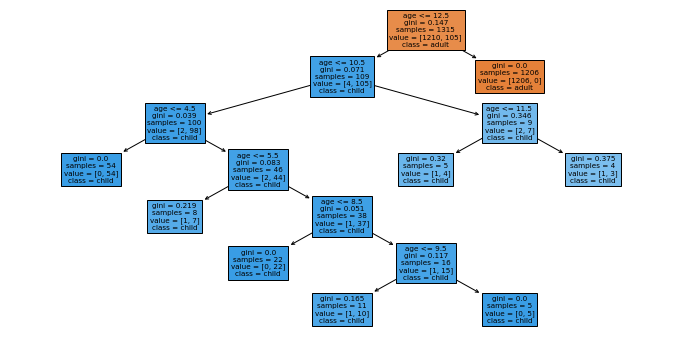

In [154]:
# visualisation avec plot_tree
tree.plot_tree(clf, feature_names=['age'], class_names=['adult', 'child'], filled=True);

In [155]:
# visualisation avec export_text
print(tree.export_text(clf, feature_names=['age']))

|--- age <= 12.50
|   |--- age <= 10.50
|   |   |--- age <= 4.50
|   |   |   |--- class: True
|   |   |--- age >  4.50
|   |   |   |--- age <= 5.50
|   |   |   |   |--- class: True
|   |   |   |--- age >  5.50
|   |   |   |   |--- age <= 8.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- age >  8.50
|   |   |   |   |   |--- age <= 9.50
|   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- age >  9.50
|   |   |   |   |   |   |--- class: True
|   |--- age >  10.50
|   |   |--- age <= 11.50
|   |   |   |--- class: True
|   |   |--- age >  11.50
|   |   |   |--- class: True
|--- age >  12.50
|   |--- class: False



## Paradoxe de Simpson

Quelles sont les proportions de survivants parmi :

- les passagers,
- les membres d'équipage,
- les hommes,
- les enfants, 
- les femmes ?

A priori, était-il préférable, pour survivre, d'être passager ou membre d'équipage ?

Quelles sont les proportions de survivants parmi :

- les passagers hommes,
- les membres d'équipage hommes,
- les passagers femmes,
- les membres d'équipage femmes ?

Vous pourrez éventuellement recalculer les proportions en excluant les enfants des passagers.

Que faudrait-il faire, selon vous, pour éviter une lecture erronée de résultats causés par ce type de paradoxe ?

# Alors, survivant ou non ?

Pour cette dernière partie, vous pourrez, au choix et en fonction de votre avancement, travailler sur une seule des deux catégories de personnes (passagers ou membres d'équipage) ou bien, de préférence, manipuler les deux catégories sous un schéma commun.

## Préparation des données

Les algorithmes d'analyse ne sont parfois (voire même souvent) utilisables que pour des valeurs numériques. Ce sera le cas ici.  
Une première étape consiste donc à :

1. déterminer les informations pertinentes pour l'analyse,
2. convertir si nécessaire ces informations en valeurs numériques (booléennes, entières ou réelles).

### Représentation des catégories

Une variable catégorielles prend une valeur dans un ensemble fini de valeurs possibles.  
Pour ce type de variable, il n'existe pas, a priori, de relation d'ordre naturelle entre les éléments.

Une solution qui arrive naturellement est d'associer un entier à chaque catégorie, et de remplacer la valeur catégorielle par cet entier. Par exemple pour le port d'embarquement, il serait possible de les numéroter de 1 à 4.  
Néanmoins, les algorithmes d'analyse se basent généralement sur l'ordre naturellement associé aux valeurs numériques. Hors celui-ci pourrait être arbitraire et introduire des erreurs dans l'analyse.

Sur l'exemple des ports d'embarquement, un ordre pertinent peut tout de même être défini à partir du trajet du Titanic, qui est parti de Belfast avant de faire escale à Southampton, Cherbourg puis Queenstown. Ce n'est pas le cas pour toutes les données catégorielles.

Une technique plus appropriée en général est de convertir les catégories en autant de colonnes binaires, par exemple `boarded_B`, `boarded_C`, `boarded_Q` et `boarded_S`. La fonction [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) permet de réaliser ce type de transformation.  
Pour les catégories n'ayant que deux valeurs distinctes, celles-ci peuvent directement être converties en booléens.

Parmi les informations fournies sur les personnes à bord du Titanic, lesquelles correspondent à des données catégorielles, et combien de valeurs distinctes possèdent-elles ?

Définir et transformer votre ou vos DataFrame(s) afin de ne conserver que des données numériques pertinentes pour l'analyse de la survie des personnes à bord.

Générer et visualiser un arbre de décision permettant de déterminer si une personne a survécu ou non.

## Classification et validation

L'objectif de cette partie est d'évaluer la qualité de l'arbre de décision pour déterminer la survie d'une personne pour laquelle la vérité de terrain ne serait pas connue.

Pour cela, le jeu de données doit être [découpé en deux](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) :

- une partie servant à l'entraînement du modèle (on parle de jeu d'entraînement),
- une partie servant à le valider (on parle de jeu de test ou de validation).

La validation consiste alors à [quantifier le ratio](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) de personnes dont l'issue a été correctement prédite par le modèle sur le jeu de test.